In [41]:
import face_recognition
import os
import numpy as np
from IPython.display import Image
# and use 
# image.ImageDataGenerator()
# image.load_img()

In [42]:
def load_images(known_images_dir):
    known_encodings = []
    known_images = []
    for file in os.listdir(known_images_dir):
        filename = os.fsdecode(file)
        image = face_recognition.load_image_file(os.path.join(known_images_dir, filename))
        enc = face_recognition.face_encodings(image)
        if len(enc) > 0:
            known_encodings.append(enc[0])
            known_images.append(filename)
            return (known_encodings, known_images)
        

In [43]:
def calculate_face_distance(known_encodings, unknown_img_path, cutoff = 0.5, num_results = 4):
    image_to_test = face_recognition.load_image_file(unknown_img_path)
    image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]
    face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)
    return (unknown_img_path, known_images[face_distances.argmin()])

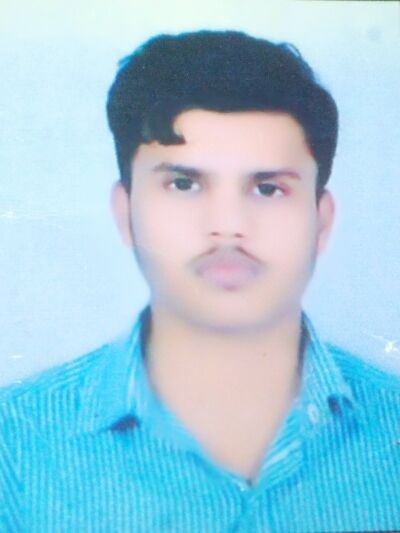

In [44]:
known_encodings, known_images = load_images("/Users/91938/Desktop/lookalikeceleb/")
original_image = "../lookalikeceleb/myimage.jpg"
Image(filename = original_image)

Hey, you look like Chris Pine!


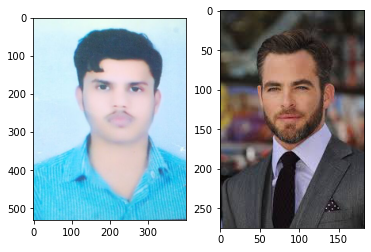

In [45]:
matching_image = calculate_face_distance(known_encodings, original_image)[1]
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

#read images
img_1 = mpimg.imread(original_image)
img_2 = mpimg.imread('C:/Users/91938/Desktop/lookalikeceleb/' + matching_image)

#display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_1);
ax[1].imshow(img_2);
print('Hey, you look like ' + os.path.splitext(matching_image)[0] + '!')